In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

pd.options.display.float_format = "{:,.2f}".format


In [2]:
df_original = pd.read_pickle('./data/df.pkl')

In [3]:
df = df_original.copy()

In [4]:
X = df.drop(['zpid', 'price'], axis=1)
y = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
sc = StandardScaler().fit(X_train)
sc_out = StandardScaler().fit(pd.DataFrame(y_train))

In [7]:
X_train.describe().T

count     mean    std    min      25%      50%      75%      max
latitude  1,988.00    40.74   0.12  40.58    40.63    40.69    40.85    40.91
longitude 1,988.00   -73.91   0.07 -74.04   -73.98   -73.90   -73.85   -73.78
beds      1,988.00     3.67   1.12   1.00     3.00     3.00     4.00     7.00
baths     1,988.00     2.51   0.64   1.50     2.00     2.00     3.00     4.00
area      1,988.00 1,791.91 559.84 935.00 1,368.00 1,683.50 2,072.00 3,578.00

In [8]:
X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)

y_train = sc_out.transform(pd.DataFrame(y_train))


In [9]:
X_train.describe().T

count  mean  std   min   25%   50%  75%  max
latitude  1,988.00 -0.00 1.00 -1.43 -1.00 -0.46 0.97 1.49
longitude 1,988.00 -0.00 1.00 -1.82 -0.94  0.13 0.88 1.81
beds      1,988.00 -0.00 1.00 -2.38 -0.60 -0.60 0.30 2.97
baths     1,988.00  0.00 1.00 -1.58 -0.80 -0.80 0.76 2.32
area      1,988.00 -0.00 1.00 -1.53 -0.76 -0.19 0.50 3.19

In [10]:
input_layer = keras.Input(shape=(X_train.shape[1],), name='input_layer')

dense_layer = layers.Dense(64, kernel_initializer='normal',activation='relu', name='dense_layer_1')(input_layer)
dense_layer = layers.Dense(32, kernel_initializer='normal',activation='relu', name='dense_layer_2')(dense_layer)


'''dense_layer = layers.Dense(64, kernel_initializer='normal',activation='relu', name='dense_layer_1')(input_layer)
dropout_layer = layers.Dropout(0.3)(dense_layer)
dense_layer = layers.Dense(32, kernel_initializer='normal',activation='relu', name='dense_layer_2')(dropout_layer)
dropout_layer = layers.Dropout(0.3)(dense_layer)
'''
'''dense_layer = layers.Dense(256, activation='elu', name='dense_layer_1')(input_layer)
dense_layer = layers.Dense(128, activation='elu', name='dense_layer_2')(dense_layer)
dense_layer = layers.Dense(64, activation='elu', name='dense_layer_3')(dense_layer)
dense_layer = layers.Dense(32, activation='elu', name='dense_layer_4')(dense_layer)
dense_layer = layers.Dense(16, activation='elu', name='dense_layer_5')(dense_layer)
dense_layer = layers.Dense(8, activation='elu', name='dense_layer_6')(dense_layer)
dense_layer = layers.Dense(4, activation='elu', name='dense_layer_7')(dense_layer)
dense_layer = layers.Dense(2, activation='elu', name='dense_layer_8')(dense_layer)'''
output_layer = layers.Dense(1, name='output_layer')(dense_layer)

model = keras.Model( inputs = [input_layer], 
                       outputs = [output_layer], name="reg_model")

#optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.predict(X_test[:10])

array([[ 0.01103121],
       [ 0.03657503],
       [ 0.05533541],
       [-0.01449262],
       [-0.01396409],
       [-0.00104849],
       [ 0.02273602],
       [ 0.01041766],
       [-0.00521337],
       [-0.02453312]], dtype=float32)

In [11]:
stop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
model.fit(X_train, y_train, batch_size=16, epochs=1000, validation_split=0.2,
          callbacks=[stop_callback], verbose=1)


Epoch 1/1000
100/100 [==============================] - 1s 2ms/step - loss: 0.4809 - mae: 0.4704 - mse: 0.4809 - val_loss: 0.4051 - val_mae: 0.4032 - val_mse: 0.4051
Epoch 2/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.4009 - mae: 0.4202 - mse: 0.4009 - val_loss: 0.4306 - val_mae: 0.4386 - val_mse: 0.4306
Epoch 3/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.3741 - mae: 0.4067 - mse: 0.3741 - val_loss: 0.5015 - val_mae: 0.4545 - val_mse: 0.5015
Epoch 4/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.3773 - mae: 0.4147 - mse: 0.3773 - val_loss: 0.3776 - val_mae: 0.4019 - val_mse: 0.3776
Epoch 5/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.3720 - mae: 0.4024 - mse: 0.3720 - val_loss: 0.3700 - val_mae: 0.3902 - val_mse: 0.3700
Epoch 6/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.3591 - mae: 0.3983 - mse: 0.3591 - val_loss: 0.3892 - val_mae: 0.3992 - val_mse: 0.3892
Epoc

In [12]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
print(loss, mae, mse)

778741678080.0 782159.625 778741678080.0


In [13]:
y_pred = model.predict(X_test).flatten()
y_pred = sc_out.inverse_transform(y_pred)

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2sq = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse, rmse, r2sq)

45203954498.9762 212612.21625056307 0.7292670820554081


<AxesSubplot:>

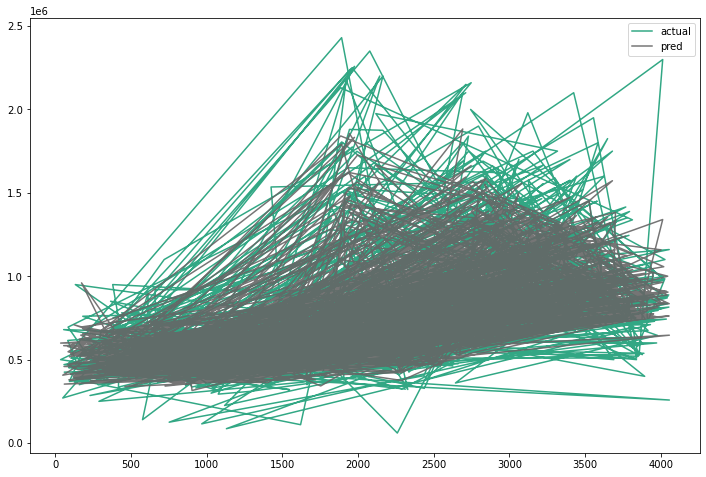

In [162]:
res = pd.DataFrame()
res['actual'] = y_test
res['pred'] = y_pred

res.plot(alpha=0.9, cmap='Dark2', figsize=(12, 8))

In [16]:
sorted(abs((res['actual'] - res['pred'])/res['actual'])*100)

[0.016960227272727273,
 0.06365935919055649,
 0.14150735294117647,
 0.16572265625000002,
 0.169775,
 0.17365044247787612,
 0.18106796116504853,
 0.2518008474576271,
 0.2568148148148148,
 0.28246323529411765,
 0.2917327586206897,
 0.3091208791208791,
 0.3781693989071038,
 0.44557,
 0.5069369369369369,
 0.5453495762711864,
 0.5887221269296741,
 0.6175127986348122,
 0.7156486579490708,
 0.736283185840708,
 0.7594834384858044,
 0.7832840909090909,
 0.7897177419354839,
 0.8151886792452829,
 0.8589736842105263,
 0.9006634615384616,
 0.9061538461538461,
 0.9434364548494982,
 0.9520000000000001,
 0.9769362745098039,
 0.98363125,
 1.0391080729166666,
 1.0786337209302326,
 1.1577115384615386,
 1.2318327702702703,
 1.2678035714285714,
 1.3096941489361702,
 1.3144263144263144,
 1.31932,
 1.358773734177215,
 1.4790563725490196,
 1.487593220338983,
 1.5336289649415693,
 1.5521874999999998,
 1.6244924242424241,
 1.6312250000000001,
 1.640728092783505,
 1.6757283464566928,
 1.7314886363636361,
 1.7421

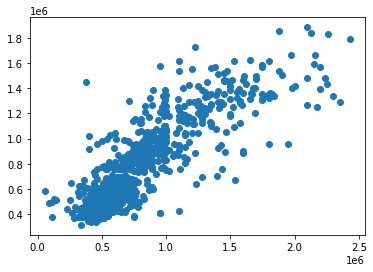

In [17]:
plt.scatter(y_test, y_pred)
plt.show()

In [18]:
df_img = df_original.copy()

In [19]:
df_img

zpid        price  latitude  longitude  beds  baths     area
5     29776969   525,000.00     40.81     -73.92  4.00   3.00 1,904.00
6     29776973   565,000.00     40.81     -73.92  6.00   3.00 1,800.00
7     29777045   805,000.00     40.81     -73.92  5.00   3.00 2,280.00
11    29777854   435,000.00     40.83     -73.92  3.00   2.00 1,728.00
13    29777997   665,000.00     40.83     -73.91  6.00   3.00 2,871.00
...        ...          ...       ...        ...   ...    ...      ...
4052  30742835   888,000.00     40.60     -73.94  3.00   3.00 1,264.00
4053  30742839   815,000.00     40.60     -73.94  3.00   3.00 1,264.00
4054  30742888 1,440,000.00     40.60     -73.96  4.00   4.00 3,105.00
4055  30742959 1,160,000.00     40.60     -73.96  3.00   2.00 1,564.00
4056   5409160   257,825.00     40.76     -73.80  4.00   3.00 2,100.00

[2840 rows x 7 columns]

In [20]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
AUTOTUNE=tf.data.experimental.AUTOTUNE

def get_label(file_path):
  parts = tf.strings.split(file_path, '/')
  file_name = parts[-1]
  file_name_without_ext = tf.strings.split(file_name, '.')[0]
  return file_name_without_ext


def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3) #color images
  img = tf.image.convert_image_dtype(img, tf.float32) 
   #convert unit8 tensor to floats in the [0,1]range
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 


def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label, file_path


edge_color = "whitesmoke"
face_color = "whitesmoke"
color_map = 'Spectral'
title_color = 'Teal'
def plot_images(images, columns_count = 5):
    images_count = len(images)
    
    rows_count = images_count//columns_count
    if images_count%columns_count > 0:
        rows_count += 1
    fig, axs = plt.subplots(rows_count, columns_count, figsize=(columns_count*4, rows_count*4),
                            sharey=False, squeeze=False,
                            facecolor=face_color, edgecolor=edge_color, linewidth=5,
                            gridspec_kw={'wspace':0.01, 'hspace':0.05}
                        )
    axs = axs.flatten()
    for ax in axs: ax.axis(False)
    for img, ax in zip(images, axs):
        ax.imshow(img)

#    plt.tight_layout()
    plt.show()

In [21]:
import os
data_dir = f'{os.getcwd()}/data/*/*'
list_ds = tf.data.Dataset.list_files(data_dir)
len(list_ds)

2840

In [22]:
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
df_temp = pd.DataFrame(columns=['img'])
for image, label, file_path in labeled_ds:
    image = image.numpy()
    label = label.numpy().decode("utf-8") 
    file_path = file_path.numpy().decode("utf-8") 
#    print("Image shape: ", image.shape)
#    print("Label: ", label)
    df_temp.loc[label, ['img', 'img_file']] = (image, file_path)
#    plot_images([image])

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [23]:
df_img_orig = df_img.merge(df_temp, right_index=True, left_on='zpid')

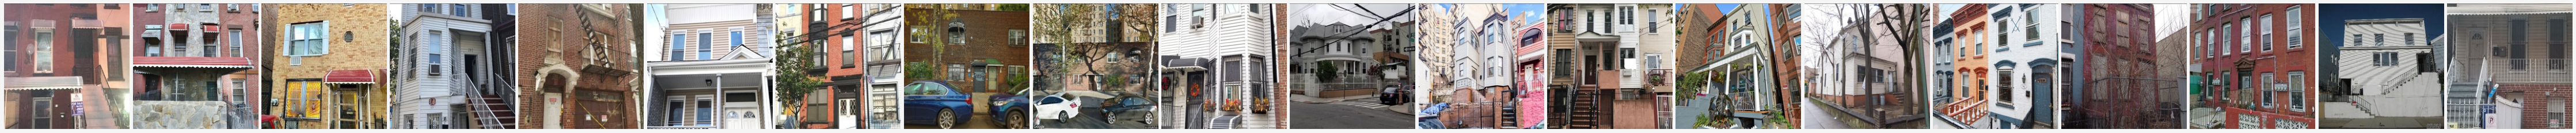

In [24]:
plot_images(df_img_orig[:20]['img'], columns_count=20)

In [25]:
df = df_img_orig.copy()

In [26]:
df.isna().sum()

zpid         0
price        0
latitude     0
longitude    0
beds         0
baths        0
area         0
img          0
img_file     0
dtype: int64

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_data_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True,
                                          rotation_range=10, zoom_range=.5,
                                         shear_range=0.2, validation_split=0.2)

train_images_generator = image_data_generator.flow_from_dataframe(
    dataframe=df_img_orig, x_col='img_file', y_col='price',
    batch_size=BATCH_SIZE, class_mode='raw',
    shuffle=True, target_size=(IMG_WIDTH, IMG_HEIGHT),
    subset='training')

test_images_generator = image_data_generator.flow_from_dataframe(
    dataframe=df_img_orig, x_col='img_file', y_col='price',
    batch_size=BATCH_SIZE, class_mode='raw',
    shuffle=True, target_size=(IMG_WIDTH, IMG_HEIGHT),
    subset='validation') # set as validation data

Found 2272 validated image filenames.
Found 568 validated image filenames.


In [28]:
house_images = [train_images_generator[i][0][0] for i in range(5) for j in range(5)]

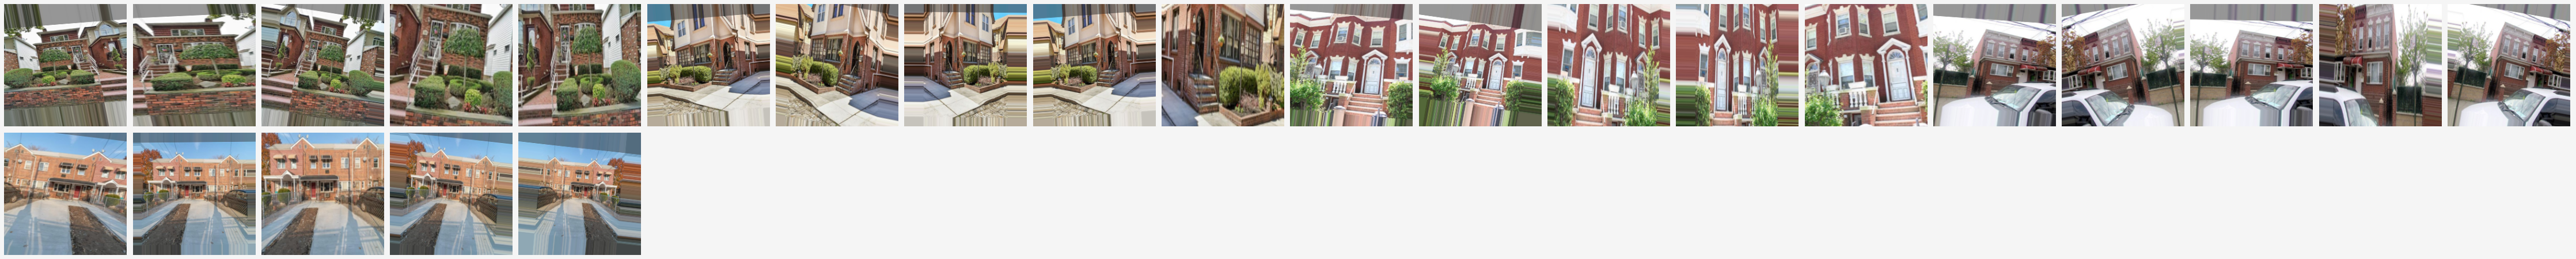

In [29]:
plot_images(house_images, columns_count=20)

In [43]:
input_shape = (224, 224, 3)

In [44]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
def create_convolution_layers(input_img):
  model = Conv2D(32, (3, 3), padding='same', input_shape=input_shape)(input_img)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D((2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
  
  model = Conv2D(64, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.25)(model)
    
  model = Conv2D(128, (3, 3), padding='same')(model)
  model = LeakyReLU(alpha=0.1)(model)
  model = MaxPooling2D(pool_size=(2, 2),padding='same')(model)
  model = Dropout(0.4)(model)
    
  return model

In [45]:

img_input_layer = tf.keras.Input(shape=input_shape)
conv = create_convolution_layers(img_input_layer)
conv = Flatten()(conv)

'''dense = Dense(512)(conv)
dense = LeakyReLU(alpha=0.1)(dense)
dense = Dropout(0.5)(dense)

dense = Dense(128)(dense)
dense = LeakyReLU(alpha=0.1)(dense)
dense = Dropout(0.5)(dense)'''

dense = Dense(64)(conv)
dense = LeakyReLU(alpha=0.1)(dense)
dense = Dropout(0.5)(dense)

dense = Dense(32)(dense)
dense = LeakyReLU(alpha=0.1)(dense)
dense = Dropout(0.5)(dense)

output_layer = Dense(1)(dense)

img_model = Model(inputs=[img_input_layer], outputs=[output_layer])

optimizer = tf.keras.optimizers.Adam(0.01)

img_model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [134]:
a = next(test_images_generator)

In [150]:
img_model.predict(a[0][10:11, :]), a[1][10]

(array([[845617.1]], dtype=float32), 478300.0)

In [46]:
stop_callback = keras.callbacks.EarlyStopping(monitor='mae', mode='min', patience=3)


In [163]:
hist = img_model.fit(
    train_images_generator,
    steps_per_epoch = train_images_generator.samples // BATCH_SIZE , 
    validation_data = test_images_generator, 
    validation_steps = test_images_generator.samples // BATCH_SIZE, 
    epochs = 100,
    callbacks=[stop_callback], verbose=1)

Epoch 1/100
71/71 [==============================] - 90s 1s/step - loss: 238717534208.0000 - mae: 372311.9062 - mse: 238717534208.0000 - val_loss: 29600718848.0000 - val_mae: 125925.7031 - val_mse: 29600718848.0000
Epoch 2/100
71/71 [==============================] - 89s 1s/step - loss: 222466850816.0000 - mae: 359097.5938 - mse: 222466850816.0000 - val_loss: 38522560512.0000 - val_mae: 163192.4688 - val_mse: 38522560512.0000
Epoch 3/100
71/71 [==============================] - 97s 1s/step - loss: 232084389888.0000 - mae: 366897.1250 - mse: 232084389888.0000 - val_loss: 25098721280.0000 - val_mae: 123183.4922 - val_mse: 25098721280.0000
Epoch 4/100
71/71 [==============================] - 94s 1s/step - loss: 220650127360.0000 - mae: 355418.6250 - mse: 220650127360.0000 - val_loss: 23638945792.0000 - val_mae: 120265.4688 - val_mse: 23638945792.0000
Epoch 5/100
71/71 [==============================] - 93s 1s/step - loss: 220929507328.0000 - mae: 357038.8125 - mse: 220929507328.0000 - val

<AxesSubplot:>

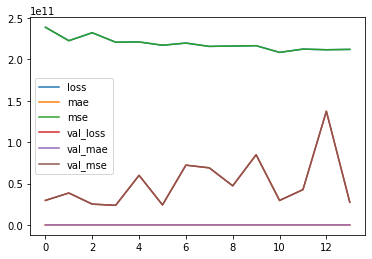

In [164]:
pd.DataFrame(hist.history).plot()

In [165]:
test_data = [test_images_generator[i][0] for i in range(1)]
pred=img_model.predict(test_data[0][:2, :])
pred

array([[611759.44],
       [622951.44]], dtype=float32)

In [166]:
df_img_orig.loc[4052, 'img'].reshape(-1, 224, 224, 3)

array([[[[0.49411768, 0.5372549 , 0.5921569 ],
         [0.49411768, 0.5372549 , 0.5921569 ],
         [0.49411768, 0.53333336, 0.59607846],
         ...,
         [0.5058824 , 0.5294118 , 0.5568628 ],
         [0.5058824 , 0.53333336, 0.5568628 ],
         [0.5058824 , 0.53333336, 0.5568628 ]],

        [[0.8352942 , 0.9176471 , 1.        ],
         [0.8352942 , 0.9176471 , 1.        ],
         [0.8352942 , 0.91372555, 1.        ],
         ...,
         [0.8588236 , 0.909804  , 0.9568628 ],
         [0.8588236 , 0.909804  , 0.9568628 ],
         [0.8588236 , 0.909804  , 0.9568628 ]],

        [[0.8117648 , 0.89019614, 0.98823535],
         [0.8117648 , 0.89019614, 0.9960785 ],
         [0.8117648 , 0.89019614, 0.9960785 ],
         ...,
         [0.8313726 , 0.87843144, 0.92549026],
         [0.8313726 , 0.87843144, 0.92549026],
         [0.8313726 , 0.87843144, 0.92549026]],

        ...,

        [[0.5921569 , 0.5921569 , 0.56078434],
         [0.5882353 , 0.5882353 , 0.5568628 ]

In [172]:
img_model.predict(df_img_orig.loc[4056, 'img'].reshape(-1, 224, 224, 3)).flatten()[0], df_img_orig.loc[4056, 'price']

(623487.2, 257825.0)

In [168]:
df_img_orig.tail()

zpid        price  latitude  longitude  beds  baths     area  \
4052  30742835   888,000.00     40.60     -73.94  3.00   3.00 1,264.00   
4053  30742839   815,000.00     40.60     -73.94  3.00   3.00 1,264.00   
4054  30742888 1,440,000.00     40.60     -73.96  4.00   4.00 3,105.00   
4055  30742959 1,160,000.00     40.60     -73.96  3.00   2.00 1,564.00   
4056   5409160   257,825.00     40.76     -73.80  4.00   3.00 2,100.00   

                                                    img  \
4052  [[[0.49411768, 0.5372549, 0.5921569], [0.49411...   
4053  [[[0.3647059, 0.4666667, 0.59607846], [0.36470...   
4054  [[[0.19607845, 0.27450982, 0.36078432], [0.203...   
4055  [[[0.50980395, 0.54901963, 0.5921569], [0.5137...   
4056  [[[0.59607846, 0.59607846, 0.59607846], [0.596...   

                                               img_file  
4052  /Users/xbbn638/Study/IITR/DeepLearning/data/pr...  
4053  /Users/xbbn638/Study/IITR/DeepLearning/data/pr...  
4054  /Users/xbbn638/Study/IITR/DeepLearning/data/pr...  
4055  /Users/xbbn638/Study/IITR/DeepLearning/data/pr...  
4056  /Users/xbbn638/Study/IITR/DeepLearning/data/pr...

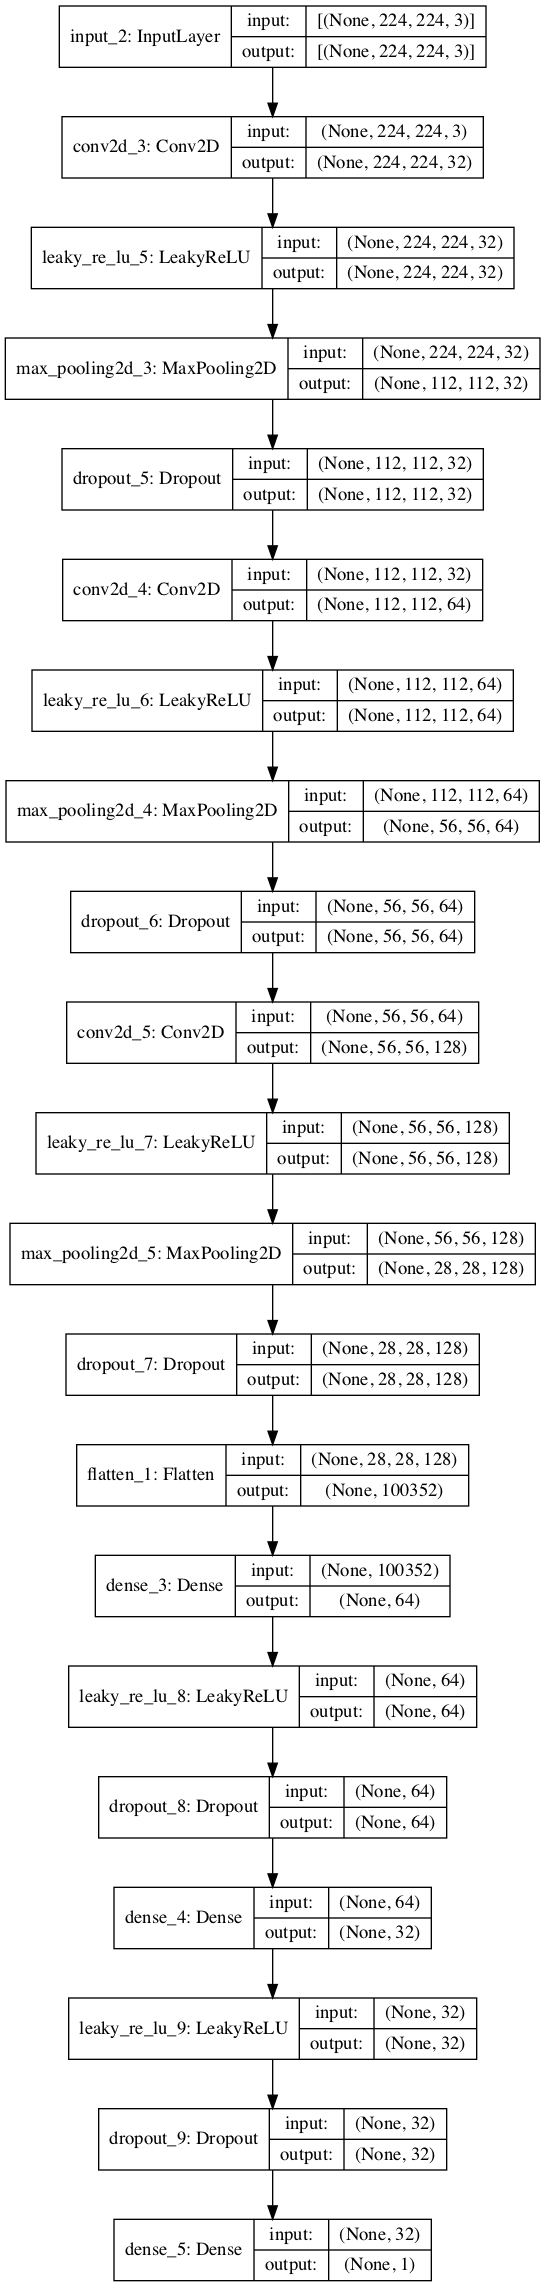

In [169]:
keras.utils.plot_model(img_model, show_shapes=True)

In [174]:
y_pred_img = img_model.predict(df_img_orig.loc[X_test.index.values, 'img'])

KeyError: '[0, 1, 2, 3, 4, 8, 9, 10, 12, 16, 17, 21, 24, 26, 28, 33, 34, 36, 39, 40, 41, 44, 46, 47, 51, 54, 56, 60, 61, 62, 64, 65, 70, 71, 74, 75, 77, 79, 81, 85, 86, 92, 96, 97, 104, 110, 111, 112, 113, 114, 118, 120, 122, 127, 128, 129, 135, 139, 141, 142, 143, 144, 148, 154, 155, 165, 166, 167, 169, 170, 172, 174, 179, 183, 188, 189, 190, 191, 192, 195, 197, 198, 199, 209, 214, 215, 227, 228, 232, 233, 237, 238, 239, 241, 242, 243, 244, 245, 246, 253, 255, 256, 257, 258, 259, 264, 278, 279, 284, 289, 294, 299, 304, 313, 314, 322, 331, 332, 339, 345, 349, 356, 357, 363, 364, 366, 367, 371, 372, 373, 376, 377, 378, 381, 388, 394, 395, 397, 402, 403, 404, 406, 408, 410, 411, 412, 416, 418, 419, 423, 424, 425, 426, 427, 431, 432, 433, 435, 437, 442, 444, 445, 448, 449, 450, 451, 453, 456, 457, 474, 481, 489, 492, 494, 498, 508, 509, 519, 528, 529, 530, 536, 538, 542, 543, 550, 559, 563, 566, 579, 581, 582, 583, 584, 587, 588, 600, 606, 609, 615, 622, 632, 640, 665, 672, 673, 680, 684, 686, 691, 707, 711, 718, 723, 733, 737, 745, 747, 751, 755, 759, 764, 775, 776, 785, 787, 800, 803, 805, 807, 809, 812, 814, 815, 817, 822, 834, 836, 840, 842, 848, 850, 851] not in index'

In [179]:
len(df_img_orig.index)

2840

In [178]:
X_test

latitude  longitude  beds  baths  area
0        1.01       0.85  0.30  -0.80  0.96
1       -1.05      -1.74  2.08   2.32  1.98
2        0.65       1.47 -0.60   2.32  2.88
3        0.81       1.34 -0.60  -0.80 -1.01
4        0.66       1.31 -0.60  -0.80 -0.89
..        ...        ...   ...    ...   ...
847      0.61       0.03  2.08  -0.80 -0.51
848      1.16       0.77 -0.60   0.76  1.27
849      1.20       0.75 -1.49  -0.80 -1.46
850     -1.41      -1.37  0.30   2.32  0.29
851     -1.08      -1.76  0.30   0.76  0.63

[852 rows x 5 columns]